## Load the Data

In [1]:
import pandas as pd
import chardet

# Determine the file's encoding
with open("C:/Shumel/GitHub/Spotify-Analyzing-Tracks-for-Next-Big-Hit/Data/spotify-2023.csv", 'rb') as file:
    raw_data = file.read(10000)  # Adjust the number of bytes read as needed
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# Read the CSV file using the detected encoding
data = pd.read_csv("C:/Shumel/GitHub/Spotify-Analyzing-Tracks-for-Next-Big-Hit/Data/spotify-2023.csv", encoding=encoding)
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [2]:
# Check the data types of the columns
data_types = data.dtypes

# Determine which columns are not numeric and should be converted if necessary
non_numeric_columns = data_types[data_types != 'int64'][data_types != 'float64'].index.tolist()

data_types, non_numeric_columns


(track_name              object
 artist(s)_name          object
 artist_count             int64
 released_year            int64
 released_month           int64
 released_day             int64
 in_spotify_playlists     int64
 in_spotify_charts        int64
 streams                 object
 in_apple_playlists       int64
 in_apple_charts          int64
 in_deezer_playlists     object
 in_deezer_charts         int64
 in_shazam_charts        object
 bpm                      int64
 key                     object
 mode                    object
 danceability_%           int64
 valence_%                int64
 energy_%                 int64
 acousticness_%           int64
 instrumentalness_%       int64
 liveness_%               int64
 speechiness_%            int64
 dtype: object,
 ['track_name',
  'artist(s)_name',
  'streams',
  'in_deezer_playlists',
  'in_shazam_charts',
  'key',
  'mode'])

In [3]:
# Convert 'streams' and 'in_deezer_playlists' to numeric, setting errors='coerce' to handle any conversion issues by setting invalid parsing to NaN
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')

# Check for missing values in the entire dataset after conversion
missing_values = data.isnull().sum()

missing_values

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [4]:
# Remove rows with any missing values
data_cleaned = data.dropna()

# After removal, check the shape of the dataset to see how many rows we have left
new_shape = data_cleaned.shape

new_shape

(748, 24)

In [5]:
# Select numerical columns for the correlation matrix
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.087586,0.037995,-0.017549,-0.101966,-0.018507,-0.136463,-0.051074,-0.088597,-0.093797,-0.003732,-0.030868,-0.038375,0.207027,0.127960,0.137096,-0.101061,-0.050225,0.042730,0.119900
released_year,0.087586,1.000000,0.076714,0.174282,-0.392204,0.069678,-0.230803,-0.198998,-0.035842,-0.218476,0.095389,0.014473,-0.005334,0.187333,-0.059355,0.095226,-0.124156,-0.014562,-0.005819,0.133819
released_month,0.037995,0.076714,1.000000,0.080313,-0.104757,-0.047623,-0.024938,-0.000164,-0.019064,-0.044869,-0.005286,-0.101204,-0.039252,-0.046403,-0.118571,-0.083710,0.054430,0.033985,-0.012348,0.039838
released_day,-0.017549,0.174282,0.080313,1.000000,-0.079669,0.021877,0.010598,0.026410,0.011086,-0.018625,0.073288,0.013509,-0.030177,0.048951,0.042779,0.050545,-0.005788,0.019280,0.001566,-0.015826
in_spotify_playlists,-0.101966,-0.392204,-0.104757,-0.079669,1.000000,0.164331,0.789822,0.708277,0.271317,0.795114,0.144342,0.113994,-0.019598,-0.106534,-0.021883,0.033808,-0.064421,-0.028134,-0.046695,-0.089722
in_spotify_charts,-0.018507,0.069678,-0.047623,0.021877,0.164331,1.000000,0.245821,0.233354,0.552232,0.166182,0.600205,0.547796,0.034713,0.030071,0.035531,0.081920,-0.054987,-0.010146,-0.047552,-0.081765
streams,-0.136463,-0.230803,-0.024938,0.010598,0.789822,0.245821,1.000000,0.772063,0.320234,0.746022,0.228598,0.056881,-0.002438,-0.105457,-0.040831,-0.026051,-0.004485,-0.044902,-0.048337,-0.112333
in_apple_playlists,-0.051074,-0.198998,-0.000164,0.026410,0.708277,0.233354,0.772063,1.000000,0.414523,0.702806,0.369032,0.155702,0.023725,-0.025326,0.057075,0.052615,-0.061781,-0.057219,-0.049596,-0.108011
in_apple_charts,-0.088597,-0.035842,-0.019064,0.011086,0.271317,0.552232,0.320234,0.414523,1.000000,0.225441,0.383668,0.412293,0.030962,-0.025204,0.047733,0.104828,-0.076793,-0.013145,-0.018733,-0.151539
in_deezer_playlists,-0.093797,-0.218476,-0.044869,-0.018625,0.795114,0.166182,0.746022,0.702806,0.225441,1.000000,0.303028,0.136028,0.038285,-0.088572,0.001323,-0.014955,0.021987,0.006747,0.005058,-0.114739


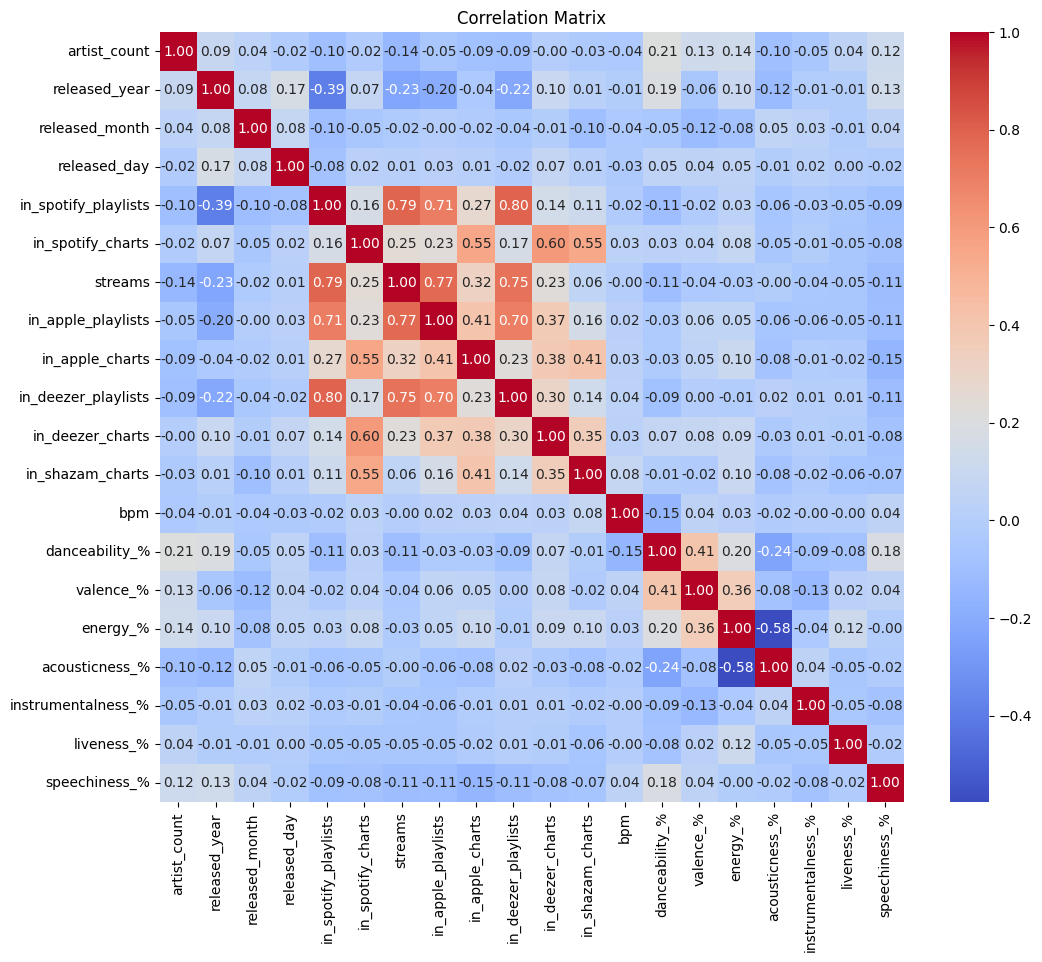

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
from scipy import stats
import numpy as np
import pandas as pd

# Assuming `data_cleaned` is your DataFrame and it has been defined somewhere above this code.

# Identify numerical columns to check for outliers
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Handling outliers using the Z-score method
# Calculate Z-scores of `data_cleaned`
z_scores = np.abs(stats.zscore(data_cleaned[numerical_cols]))

# Define a threshold for identifying outliers
threshold = 3

# Remove rows that contain outliers in any of the numerical columns
data_no_outliers = data_cleaned[(z_scores < threshold).all(axis=1)]

# After removing outliers, manually scale the data
data_scaled = data_no_outliers.copy()

# Manually scaling the data without sklearn
for col in numerical_cols:
    col_mean = data_scaled[col].mean()
    col_std = data_scaled[col].std()
    data_scaled[col] = (data_scaled[col] - col_mean) / col_std

# Check the shape of the dataset after outlier removal and scaling
final_shape = data_scaled.shape

print(final_shape)


(606, 24)


In [8]:
import numpy as np
import pandas as pd

# Assuming 'data_scaled' is your preprocessed and scaled dataset

# Select features and target variable for the model
X = data_scaled[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
                 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'danceability_%', 'valence_%',
                 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
y = data_scaled['streams']

# Custom function to split data into training and testing sets
def custom_train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    total_size = X.shape[0]
    test_size = int(total_size * test_size)
    all_indices = np.arange(total_size)
    np.random.shuffle(all_indices)
    test_indices = all_indices[:test_size]
    train_indices = all_indices[test_size:]
    
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test

# Splitting the dataset into training and testing sets using the custom function
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2, random_state=42)

# Add an intercept term to the training and testing sets
X_train_with_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_with_intercept = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Compute Cost Function
def compute_cost(X, y, beta):
    m = len(y)
    predictions = X.dot(beta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

# Gradient Descent Function
def gradient_descent(X, y, beta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(beta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        beta = beta - sum_delta
        cost_history[i] = compute_cost(X, y, beta)

    return beta, cost_history

# Initialize beta, learning rate, and iterations
initial_beta = np.zeros((X_train_with_intercept.shape[1], 1))
alpha = 0.01
iterations = 1000

# Perform gradient descent
beta, cost_history = gradient_descent(X_train_with_intercept, y_train.values.reshape(-1,1), initial_beta, alpha, iterations)

# Predict Function
def predict(X, beta):
    return X.dot(beta)

# Mean Squared Error Function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# R-squared Function
def r_squared(y_true, y_pred):
    total_variance = np.var(y_true, ddof=1)
    unexplained_variance = np.var(y_true - y_pred, ddof=1)
    return 1 - (unexplained_variance / total_variance)

# Predicting on the testing set
y_pred = predict(X_test_with_intercept, beta)

# Calculating MSE and R^2 for the test set
mse_test = mean_squared_error(y_test.values.reshape(-1, 1), y_pred)
r2_test = r_squared(y_test.values.reshape(-1, 1), y_pred)

# Print the results
print("Mean Squared Error:", mse_test)
print("R^2 Score:", r2_test)


Mean Squared Error: 0.24588130147883713
R^2 Score: 0.7130102519346582


Linear Regression Model Performance:

Mean Squared Error (MSE): 0.24588130147883713
R^2 Score: 0.7130102519346582
The linear regression model has a relatively low MSE, indicating that the model's predictions are, on average, close to the actual values. The R^2 score suggests that approximately 71.3% of the variance in the dependent variable is predictable from the independent variables. This is a decent level of predictive accuracy, showing that the model explains a significant portion of the variance.